## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN CODE HERE #END CODE HERE`. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [ ]:
NAME = "Oikonomou Konstantinos"
AEM = "3279"

---

# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [ ]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import unittest

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

Saving income.csv to income.csv
Saving income_test.csv to income_test.csv


## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library and split the dataset into train and test set using the appropriate function. Use 30% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [ ]:
# BEGIN CODE HERE
X = load_breast_cancer().data
y = load_breast_cancer().target
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_VARIABLE)
#END CODE HERE

In [ ]:
print("Size of train set:{}".format(len(y_train)))
print("Size of test set:{}".format(len(y_test)))
print("Unique classes:{}".format(len(set(y_test))))

Size of train set:398
Size of test set:171
Unique classes:2


**Expected output**:  
Size of train set:398  
Size of test set:171  
Unique classes:2  

**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other

In [ ]:
# BEGIN CODE HERE
classifier_gini = DecisionTreeClassifier(criterion='gini', random_state=RANDOM_VARIABLE)
classifier_igain = DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_VARIABLE)

classifier_gini.fit(X_train, y_train)
classifier_igain.fit(X_train, y_train)

prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

f_measure_gini = f1_score(y_test,prediction_gini)
f_measure_igain = f1_score(y_test,prediction_igain)

#END CODE HERE

In [ ]:
print("F-Measure Gini:{}".format(f_measure_gini))
print("F-Measure Information Gain:{}".format(f_measure_igain))

F-Measure Gini:0.9528301886792453
F-Measure Information Gain:0.9724770642201834


**Expected output**:  
F-Measure Gini:0.9528301886792453  
F-Measure Information Gain:0.9724770642201834  


**1.3** Find the maximum depth reached by the tree that used the Gini impurity. Train multiple classifier by modifying the max_depth within the range from 1 to maximum depth and save the f1 scores to lists.  

In [ ]:
# BEGIN CODE HERE
depth = classifier_gini.max_depth

fscores_train = []
fscores_test = []

for i in range(depth):
  classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=RANDOM_VARIABLE)
  classifier_gini.fit(X_train, y_train)

  prediction_train = classifier_gini.predict(X_train)
  prediction_test = classifier_gini.predict(X_test)

  f_gini_train = f1_score(y_train,prediction_train)
  f_gini_test = f1_score(y_test,prediction_test)

  fscores_train.append(f_gini_train)
  fscores_test.append(f_gini_test)

#END CODE HERE

In [ ]:
print("Fscores Train:{}".format(fscores_train))
print("Fscores Test:{}".format(fscores_test))


Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]


**Expected output**:  
Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]  
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]



**1.4** Compare the results from the train set with the results from the test set. What do you notice? Explain your findings. How are you going to choose the max_depth of your model?

The train set start witth better initial results as expected and has an increasing success rate, with the 4th and 5th being the same. With the F score being 99.6% we could use and algorythm to stop at that depth (max_depth = 4), since the next result is the same, but that depends if we want better results or efficiency. The test set starts at 91.5% and at depth = 3 it reaches it's peak, 97.2%. After that it drops back to a final 95.2% F Score. We could stop at max_depth = 3 since the train and test results are pretty similar, 97.6% and 97.2% and that would be more efficient in a large data set and with better test results

## 2.0 Pipelines ##

**2.1** In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

In [ ]:
# BEGIN CODE HERE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from google.colab import files
import io

#upload the income.csv and income_test.csv files
uploaded = files.upload()

#save files as pandas dataframe
data_train = pd.read_csv(io.BytesIO(uploaded['income.csv']))
data_test = pd.read_csv(io.BytesIO(uploaded['income_test.csv']))

#fill empty values
def fill_empty(data):
  data_text = data.dtypes
  data_text_array = np.array(data_text.index)

  for i in range(data_text_array.size):
    if (data[data_text_array[i]].dtypes == np.object):
      data[data_text_array[i]] = data[data_text_array[i]].fillna('None')
    else:
      data[data_text_array[i]] = data[data_text_array[i]].fillna(0)
  
  return data

#handle text and categorical atributes
def cat_handle(data):
  encoder = LabelEncoder()

  data_encoded = []

  data_text = data.dtypes[data.dtypes == np.object]
  data_text_array = np.array(data_text.index)

  for i in range(data_text_array.size):
    data_cat = data[data_text_array[i]]
    data_cat_encoded = encoder.fit_transform(data_cat)

    data_encoded.append(data_cat_encoded)

  return data_encoded

#binarization
def one_hot(data):
  encoder = OneHotEncoder()

  data_1hot = []

  data = np.array(data)

  for i in range(data.shape[0]):
    data_1hot = encoder.fit_transform(data.reshape(-1,1))

  return data_1hot

#custom pipeline
def pipeline(data):
  data_fill = fill_empty(data_train) #imputer
  data_cat = cat_handle(data_fill) #cat_handler
  data_1hot = one_hot(data_cat) #label_binarizer

  return data_1hot

#set X, y parameters, y = the income column
X_train = data_train.drop('income', axis='columns')
y_train = data_train['income'].values

X_test = data_test.drop('income', axis='columns')
y_test = data_test['income'].values

#prepare the data from classification
X_train_prepared = pipeline(X_train).toarray()
y_train_prepared = pipeline(y_train).toarray()

X_test_prepared = pipeline(X_test).toarray()
y_test_prepared = pipeline(y_test).toarray()

#set the classifier
classifier = DecisionTreeClassifier()

#train the model
classifier.fit(X_train_prepared, y_train_prepared)

#predict with the results
prediction_train = classifier.predict(X_train_prepared)
prediction_test = classifier.predict(X_test_prepared)

#get F and Accuracy Scores
fScore_train = f1_score(y_train_prepared,prediction_train,average='micro')
accScore_train = accuracy_score(y_train_prepared,prediction_train)

fScore_test = f1_score(y_test_prepared,prediction_test,average='micro')
accScore_test = accuracy_score(y_test_prepared,prediction_test)

#show results
print("Train F Score: ", fScore_train*100, "%")
print("Train Accouracy: ", accScore_train*100, "%")

print("\nTest F Score: ", fScore_test*100, "%")
print("Test Accouracy: ", accScore_test*100, "%")
#END CODE HERE

Train F Score:  100.0 %
Train Accouracy:  100.0 %

Test F Score:  100.0 %
Test Accouracy:  100.0 %


**2.2** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

The missing values, since we have int and string objects in the data set, are handled accordingly. I check first the data type of each column and fill it, if it's int with 0 and if it's string with 'None'. That takes assumption that any missing values are missing because they don't apply, let's say if someone is unemployed they leave that field blank and so the employment field will be filled as 'None'.

Next i encode the data with the categorical handler, setting each one as an integer according to the number of availabe options in each category. Let's say one category takes 4 string options, they are converted as 0, 1, 2, 3.

This way each category is listed in a relation order, 0 is more similar to 1 that to 2, even though that might not be the case in reality, so i convert each option into a binary category that takes 0 and 1 as an option. This way the data are not being missclassified and they match the real world counterparts.

No further prossesing is required for the data to be passed into the custom pipeline function, so first the data set is past into the fill_empty function then the cat_handle and that into the one_hot function. First they are being separated into X, y for the train and test set and after that they pass into the pipeline function. The result is passed into a new variable as an array filled with the categorical data for each row category. After that the training of the model starts with the Decision Tree Classifier, the Predicted test values are being calculated and the are being cross-validated with F Score and Accuracy measuments. This model reaches 100% accuracy on both measurements.

## 3.0 Common Issues ## 

**3.0** Run the following code to define a DecisionTreeModel and load the **income** dataset only with the numerical variables. Then, answer the following questions. 

In [ ]:
# Load Data
columns = ['age','fnlwgt','education_num','hours-per-week',"capital-loss","capital-gain","income"]
data = pd.read_csv('income.csv',usecols=columns)
data_test = pd.read_csv('income_test.csv',usecols=columns)
# Convert target variable to 0 and 1
data["income"] = data["income"].map({ "<=50K": 0, ">50K": 1 })
data_test["income"] = data_test["income"].map({ "<=50K": 0, ">50K": 1 })
# Create X and y
X_train = data.drop(["income"],axis=1)
y_train = data['income'].values
X_test = data_test.drop(["income"],axis=1)
y_test = data_test['income'].values
# Classifier
classifier = DecisionTreeClassifier(min_samples_leaf=4)

**3.1** Draw a learning curve for the classifer for the train and test set loaded above.

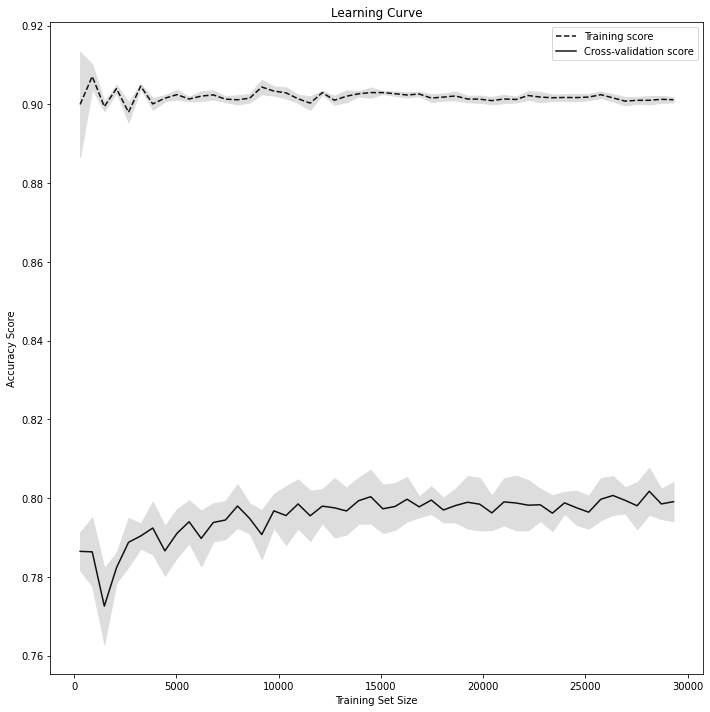

In [ ]:
# BEGIN CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve as lc

def learning_curve(classifier, X, y): #Use any parameters you need
    train_sizes, train_scores, test_scores = lc(classifier, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

learning_curve(DecisionTreeClassifier(min_samples_leaf=4), X_train, y_train)

#END CODE HERE

**3.2** Do you notice any problems with the classifier? If so, what can you do to change this.

The Classifier with the raw numeric data shows a gap between the train and test results, the test results especialy have and an even curve that ends up in about 80% accuracy. The train results are much better and smoother at a final accuracy measure of about 90%. Both of them experience peaks and drops, as they are not pre-processed data. If we were to run them through the pipeline function on 3.0 we would see a curve that quickly gets to 100% accuracy and stays there, with no fluctuations in the entirety of the curve

**3.3** Implement your solution using the cells below. Report your results and the process you followed. 

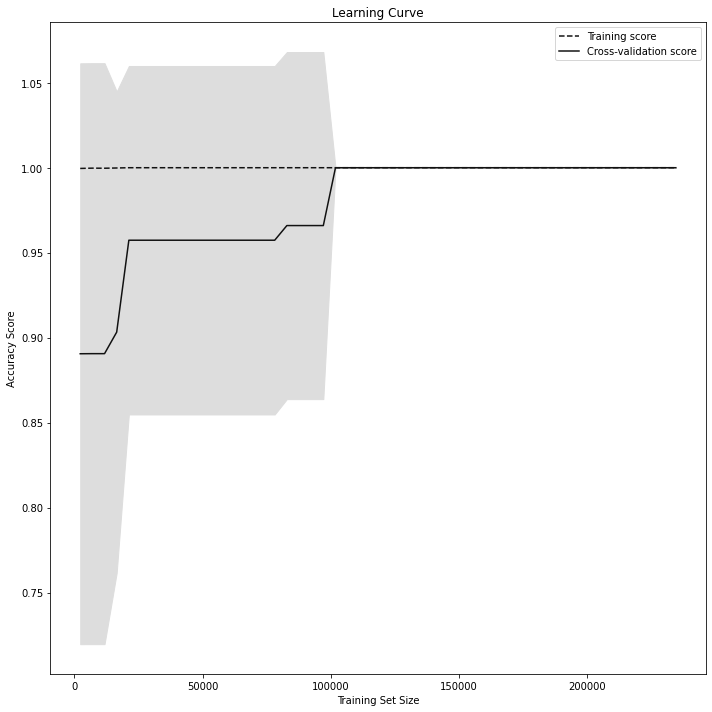

In [ ]:
# BEGIN CODE HERE
X_prep = pipeline(X_train).toarray()
y_prep = pipeline(y_train).toarray()

learning_curve(DecisionTreeClassifier(min_samples_leaf=4), X_prep, y_prep)

#END CODE HERE

As we see above the training data set is at a constant 100% accuracy with the pre-processed data and the test data set starts at a much better 89% accuracy and get quickly to 100%